### Decision Tree

Decision Tree, in general is graphical representation of all possible solutions to a decision.  Here we have a dataset with collection of data of species in a zoo.  The fields describe features such as hair, feathers, eggs,  milk, airborne, aquatic, predator,toothed, backbone, breathes, venomous,fins, legs, tail, domestic, catsize to decide on the type of the species, such as animal, bird, fish, insect, reptile, arthropods.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ZooDecisionTree.csv to ZooDecisionTree.csv


In [ ]:
import io
zoo = pd.read_csv(io.BytesIO(uploaded['ZooDecisionTree.csv'])) 
zoo.head()

,Animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,animal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,animal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,animal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,animal


The field 'type' is the dependent variable (Y) and hence it can be decided based on the data in other fields.  The independent variables are the input data(X).  The following code classifies data as the input and target data.

In [ ]:
target = zoo['type']
df = zoo.copy()
df = df.drop('Animal',axis=1)
df = df.drop('type',axis=1)
inputs= df

In [ ]:
target

0          animal
1          animal
2            fish
3          animal
4          animal
          ...    
96         animal
97         insect
98         animal
99     arthropods
100          bird
Name: type, Length: 101, dtype: object

The target has categorical variables, which cannot be accessed by the algorithm.  Hence we would encode it in numeric values using LabelEncoder() function of sklearn.

In [ ]:
#label encoding
lbl_encd = LabelEncoder()
target = lbl_encd.fit_transform(target)
target

array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2, 3, 1, 1, 1, 2, 0, 3, 0, 2, 2,
       0, 2, 5, 4, 4, 0, 0, 0, 5, 0, 0, 2, 3, 0, 0, 2, 3, 5, 5, 2, 5, 2,
       0, 0, 1, 0, 0, 0, 0, 5, 4, 1, 0, 0, 2, 2, 2, 2, 3, 3, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 6, 1, 2, 2, 6, 1, 3, 2, 0, 1, 3, 2,
       5, 4, 6, 6, 3, 0, 0, 2, 0, 5, 0, 1, 2])

The target field type has been encoded with 0 for animal, 1 for arthropods, 2 for bird, 3 for fish,4 for frog, 5 for  insect and 6 for reptile

Now, lets split the dataset into training and testing datas using sklearn's train_test_split.

In [ ]:
# splitting the data 80:20 training:testing ratio
x_trn,x_tst,y_trn,y_tst = train_test_split(inputs,target,test_size=0.2,random_state=42)
print('Training split input - ',x_trn.shape)
print('Testing split input',x_tst.shape)

Training split input -  (80, 16)
Testing split input (21, 16)


Now that the data is split, lets train the training data using DecisionTreeClassifier Algorithm.

In [ ]:
# Defining Decision Tree Algorithm
dtree = DecisionTreeClassifier()
dtree.fit(x_trn,y_trn)
print('Decision Tree Classifier Used')

Decision Tree Classifier Used


In [ ]:
#Predicting the values of test data
y_prdt = dtree.predict(x_tst)
print("Classification report \n", classification_report(y_tst,y_prdt))

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report, shows the result of application of the algorithm to the test data.  It shows an accuracy of 0.95, which is very good.  The confusion matrix is calculated and ploted using matplotlib in the following code.

Text(0.5, 1.0, 'Accuracy Score 0.9523809523809523')

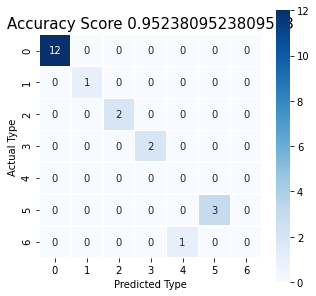

In [ ]:
conf_mat = confusion_matrix(y_tst,y_prdt)
plt.figure(figsize=(5,5))
sns.heatmap(data=conf_mat,linewidths=.5, annot=True,square=True,cmap='Blues')
plt.ylabel('Actual Type')
plt.xlabel('Predicted Type')
graph_title = 'Accuracy Score {0}'.format(dtree.score(x_tst,y_tst))
plt.title(graph_title,size=15)

IndexError: ignored

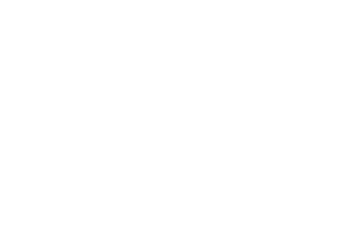

In [ ]:
decs_tree = plot_tree(decision_tree=dtree,feature_names=df.columns,
                      class_names=["animal","bird","arthropods","fish","frog","reptile"], 
                      filled=True, precision=4, rounded=True)
